In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

Text(0, 0.5, 'y')

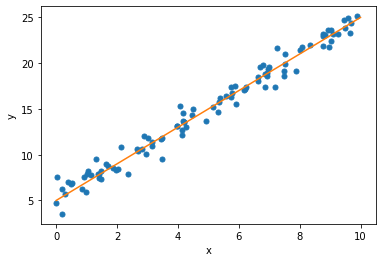

In [44]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(x, y, 'o', ms = 5)

xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx )
plt.xlabel('x')
plt.ylabel('y')

In [28]:

# def compute_rss(y_estimate, y):
#   return sum(np.power(y-y_estimate, 2))

# def estimate_y(x, b_0, b_1):
#   return b_0 + b_1 * x

# rss = compute_rss(estimate_y(x, beta_0, beta_1), y) 
# rss

81.540007425512

In [45]:
rss = []

slopes = np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 -slope*x)**2))

ind_min = np.argmin(rss)

print(slopes[ind_min])

2.003999999993347


Text(0, 0.5, '$RSS$')

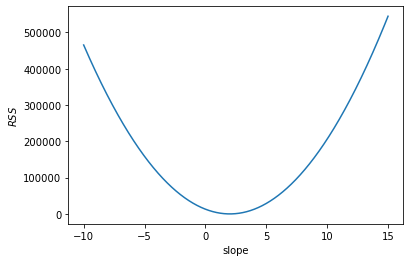

In [41]:
plt.figure()
plt.plot(slopes,rss)
plt.xlabel('slope')
plt.ylabel('$RSS$')

In [42]:
y

array([13.65607504, 17.38428865,  4.69608348, 11.8746261 ,  8.16521255,
        7.60878308,  8.50287608, 11.71045647, 13.12191088, 16.18638633,
       13.58219001, 18.82339865,  8.41838271, 22.93991251,  5.66957313,
       19.53883411, 14.54501393, 16.35895299,  7.43245382,  8.32329937,
       21.43838573, 24.44257158, 10.92462989, 18.89004917, 21.9077822 ,
       23.5901653 ,  6.25375566,  7.00560337,  8.80010003, 23.15642859,
        5.87202483, 13.59153493, 24.89834705, 14.7096051 , 18.57132377,
       11.34292717, 17.35690123, 22.00767283,  6.21192619, 19.14337036,
       25.12776776, 18.65102968, 10.57018433, 19.16981421,  8.18593784,
       14.36677106, 23.14729311, 10.09712135, 12.0292627 ,  9.56767319,
        3.52935729, 19.81287469, 10.86021307, 10.64894488, 13.63219515,
        6.93059622, 16.30143181,  7.33065087, 15.5560526 , 19.5457047 ,
        7.83949544, 12.65758903, 19.40857949, 12.139244  ,  6.80093021,
       15.76449542, 18.08932313, 15.19603637, 24.76078128, 17.48